# Data Visualisation with Pandas:

<i>Pandas</i> is a Python library written by Wes McKinney for data manipulation and analysis. It provides fast and flexible data structures which make working with relational data more easy and intuitive and is currently one of the most active and important Python data analysis libraries.

## Getting started

Start by making the necessary imports. The <i>pandas</i> library can be imported as any name but <b>pd</b> is the convention you will see used in most publications and online material:

In [1]:
import pandas as pd

We will be using <i>matplotlib.pyplot</i> later on when we are presenting our data so we will also import this:

In [2]:
import matplotlib.pyplot as plt

# Must include so that graphs can be properly displayed in Jupyter notebook cells
%matplotlib inline

We will be creating a few graphs in this notebook so to make them more aesthetically pleasing, we will also import seaborn (see tutorial on seaborn for more information on how to change the appearance of your plots using this library).

In [3]:
import seaborn as sns

## Extracting and displaying the data

Now that we have imported the libraries we need, we will look at different sources of data we can use when creating what is known as a <b>DataFrame</b>.
> A <b>DataFrame</b> is <i>a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled rows and columns</i> and is the primary pandas data structure.

The first source of data we will look at is data we generate ourselves. We will create this data using lists for each column in the table which we will then merge together before creating a DataFrame object from it. 

Let's start by defining the values for two columns whose data will describe the number of sales of different products in a shop:

In [4]:
products = ['Lawnmower','Deck Chair','Paint Brush','Garden Bench','Artificial Fountain']
sales = [231,423,603,64,32]

We can merge these two lists together to create a list of tuple pairs using the <i>zip</i> and <i>list</i> functions:

In [5]:
shop_sales = list(zip(products,sales))

Let's check that the list of tuples was created properly by displaying it. We can do this by simply writing the name of this new list:

In [6]:
shop_sales

[('Lawnmower', 231),
 ('Deck Chair', 423),
 ('Paint Brush', 603),
 ('Garden Bench', 64),
 ('Artificial Fountain', 32)]

As you can see, the list has been created successfully. Each tuple consists of the name of a product from the shop along with the number of times it was sold. Now we are ready to create a DataFrame object from this data, whose column names we can define using the <i>columns</i> attribute of the DataFrame object:

In [7]:
df = pd.DataFrame(data=shop_sales, columns=['Products', 'Sale Count'])

Now let's display it:

In [8]:
df

,Products,Sale Count
0,Lawnmower,231
1,Deck Chair,423
2,Paint Brush,603
3,Garden Bench,64
4,Artificial Fountain,32


We have now successfully created a <i>pandas</i> DataFrame from data we defined using simple lists.

However, in real life it is not practical to type out all of your data values in lists; a more common, efficent source which we will now look at is a <b>CSV file</b>.

> A <b>Comma-Separated Values (CSV) file</b> is a file which stores tabular data in plain text, each line of which is a data record. The first row of the CSV file is, by default, interpreted as the names of the columns.

If we want to convert the DataFrame we just created to a CSV file, we can do so easily using the pandas function <i>to_csv()</i>. This function takes in many parameters (for more details, see here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html), however we are only going to use two in this example:

In [9]:
# Specify the name of the CSV file you are creating and omit the index column from it 
df.to_csv('shopsales.csv', index=False)

Let's now check that this new CSV file was created properly by reading in the new file using the pandas function <i>read_csv()</i>:

In [10]:
sales = pd.read_csv("shopsales.csv")

Let's check that our data was read in correctly by displaying the DataFrame. This can be achieved by simply typing the name of the data frame:

In [11]:
sales

,Products,Sale Count
0,Lawnmower,231
1,Deck Chair,423
2,Paint Brush,603
3,Garden Bench,64
4,Artificial Fountain,32


We can see that this worked properly as all rows of the original table are present and the index column was not copied across as we specified (the new index column is that of the new DataFrame).

Pandas offers a very simple means of plotting columns using the <i>plot()</i> function along with the column that you want to plot. You can add more features to the plot using the <i>matplotlib</i> library.

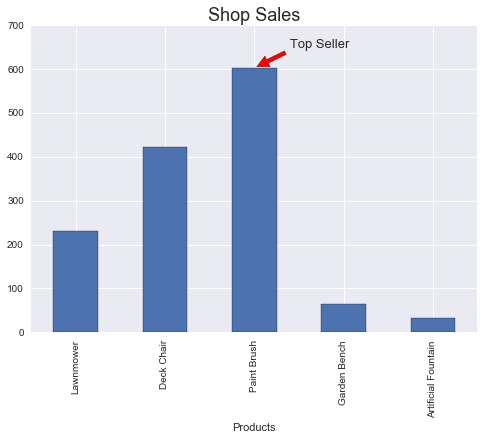

Relevant data from DataFrame:


,Products,Sale Count
Products,,
Paint Brush,Paint Brush,603


In [12]:
# Change index column to be 'products' as pandas automatically plots values of index column as x axis values
sales.index = sales['Products']
# Create plot. Optionally specify the type of plot using the 'kind' parameter
sales['Sale Count'].plot(kind="bar")

# Find out the highest number of sales of a single product in the DataFrame and assign it to a variable
highest_sales = sales['Sale Count'].max()

# Find out the name of the product that had the highest number of sales
top_seller = sales['Products'][sales['Sale Count'] == highest_sales].values

# Text that will be a comment on a particular point of the graph
text = "Top Seller"

# Add text to the plot
plt.annotate(text, xy=(2, highest_sales), xytext=(2.4, 650),arrowprops=dict(facecolor='red', shrink=0.07), fontsize=13)
plt.title('Shop Sales', fontsize=18)

plt.show()

print("Relevant data from DataFrame:")
sales[sales['Sale Count'] == highest_sales]

For variety, let's take a look at another CSV file which holds a lot of data. The dataset I am going to use is a list of failed banks in the US since October 1st 2000, as compiled by the Federal Deposit Insurance Corporation. This dataset can be downloaded here: https://www.fdic.gov/bank/individual/failed/banklist.html.

Once again, we can read in the data from our CSV file to a DataFrame object using <i>read_csv()</i>:

In [13]:
#dframe = pd.read_csv("datasets/failedbanks.csv")
dframe = pd.read_csv("https://www.fdic.gov/bank/individual/failed/banklist.csv")

Let's check that our data was read in correctly by displaying the DataFrame; this is quite a large dataset so we will use a special function called <i>head()</i> to display the first 5 rows.

In [14]:
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,Longview,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


To display the first x rows, we can call <i>head(x)</i>. 

As you can see, <i>pandas</i> has created a neat table displaying the data from our CSV file, the first row from which is interpreted as the names of the columns. If we wanted the index column to contain something different as opposed to default indexing, we could do so by assigning this role to one of the dataset's columns, as shown below:

In [15]:
#dframe = pd.read_csv("datasets/failedbanks.csv", index_col='Closing Date', encoding='latin1', 
#                    parse_dates=['Closing Date'], dayfirst=True)
dframe = pd.read_csv("https://www.fdic.gov/bank/individual/failed/banklist.csv", index_col='Closing Date', encoding='latin1', 
                    parse_dates=['Closing Date'], dayfirst=True)
dframe.head(10)

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2016-08-19,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16
2016-05-06,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,12-Jul-16
2016-04-29,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,4-Aug-16
2016-03-11,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,16-Jun-16
2015-10-02,Hometown National Bank,Longview,WA,35156,Twin City Bank,13-Apr-16
2015-10-02,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,13-Apr-16
2015-07-10,Premier Bank,Denver,CO,34112,"United Fidelity Bank, fsb",17-Aug-16
2015-05-08,Edgebrook Bank,Chicago,IL,57772,Republic Bank of Chicago,12-Jul-16
2015-02-27,Doral Bank,San Juan,PR,32102,Banco Popular de Puerto Rico,13-May-15


The built-in function <i>tail()</i> works exactly the same as <i>head</i> except instead of operating on the rows at the start of the table, it operates on those at the end:

In [16]:
dframe = pd.read_csv("datasets/failedbanks.csv")
# Displays last 5 rows by default
dframe.tail()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
541,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
542,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
543,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
544,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05
545,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,13-Oct-00,17-Mar-05


In [17]:
# Displays the last n rows
dframe.tail(8)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
538,Bank of Sierra Blanca,Sierra Blanca,TX,22002,The Security State Bank of Pecos,18-Jan-02,6-Nov-03
539,"Hamilton Bank, NA",Miami,FL,24382,Israel Discount Bank of New York,11-Jan-02,21-Sep-15
540,Sinclair National Bank,Gravette,AR,34248,Delta Trust & Bank,7-Sep-01,10-Feb-04
541,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
542,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
543,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
544,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05
545,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,13-Oct-00,17-Mar-05


As well as retrieving a specific number of rows, we can also retrieve specific columns:

In [18]:
dframe[['Bank Name', 'City', 'Closing Date']].head()

,Bank Name,City,Closing Date
0,The Woodbury Banking Company,Woodbury,19-Aug-16
1,First CornerStone Bank,King of Prussia,6-May-16
2,Trust Company Bank,Memphis,29-Apr-16
3,North Milwaukee State Bank,Milwaukee,11-Mar-16
4,Hometown National Bank,Longview,2-Oct-15


Or just a single column of interest:

In [19]:
dframe[['Bank Name']].head()

,Bank Name
0,The Woodbury Banking Company
1,First CornerStone Bank
2,Trust Company Bank
3,North Milwaukee State Bank
4,Hometown National Bank


## Analysing the data:

A very useful pandas function which provides the user with the ability to find out the number of instances of a particular entry in a DataFrame is <i>value_counts()</i>. 

To illustrate the application of this function, let's identify and plot the names of the top 5 cities in which the most banks fail:

In [20]:
#Find out the number of times each city appears in the DataFrame. The output is displayed from highest to lowest number of instances.
city_count = dframe['City'].value_counts()
#Extract the top 5 cities from the above extraction
top_5 = city_count.head()
#Display the top 5 cities
top_5

Chicago    18
Atlanta    10
Phoenix     6
Naples      5
Miami       4
Name: City, dtype: int64

We can then easily plot this information using the <i>plot()</i> function, like we did above:

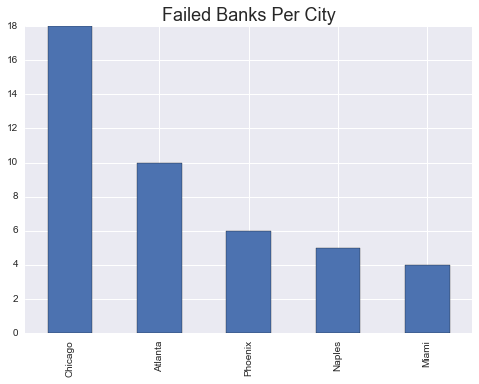

In [21]:
#Create graph
top_5.plot(kind='bar')
#Give the graph a title
plt.title("Failed Banks Per City", fontsize=18)

The default type of graph created by the <i>plot()</i> function is a line graph. However, as shown above, we can generate different types of graph using the <i>kind</i> parameter. It takes in one of several possible parameters:

- <b>‘line’</b> : line plot (default)
- <b>‘bar’</b> : vertical bar plot
- <b>‘barh’</b> : horizontal bar plot
- <b>‘hist’</b> : histogram
- <b>‘box’</b> : boxplot
- <b>‘kde’</b> : Kernel Density Estimation plot
- <b>‘density’</b> : same as ‘kde’
- <b>‘area’</b> : area plot
- <b>‘pie’</b> : pie plot
- <b>‘scatter’</b> : scatter plot
- <b>‘hexbin’</b> : hexbin plot

For example:

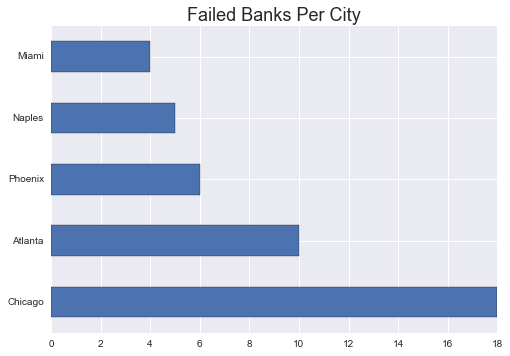

In [22]:
top_5.plot(kind='barh')
plt.title("Failed Banks Per City", fontsize=18)

Let's look at more ways in which we can filter the results we receive when querying a DataFrame.

Say you are intrigued by the fact that Chicago is where the most banks have failed since 1st October 2000 and want to view a few DataFrame entries for banks that failed in that city:

In [23]:
chicago_banks = dframe[dframe['City'] == "Chicago"]
chicago_banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
7,Edgebrook Bank,Chicago,IL,57772,Republic Bank of Chicago,8-May-15,12-Jul-16
10,Highland Community Bank,Chicago,IL,20290,"United Fidelity Bank, fsb",23-Jan-15,21-Apr-15
14,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16
16,"GreenChoice Bank, fsb",Chicago,IL,28462,"Providence Bank, LLC",25-Jul-14,28-Jul-15
51,Covenant Bank,Chicago,IL,22476,Liberty Bank and Trust Company,15-Feb-13,21-Sep-15


Pandas extracts which banks are from Chicago and which are not by checking, for each row of the DataFrame, whether the statement 

            dframe['City'] == "Chicago"

is true or false. Only those which evaluate to <i>True</i> will be added to the new DataFrame. The checking process can be viewed simply by executing the aforementioned Boolean expression:

In [24]:
dframe['City'] == "Chicago"

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10      True
11     False
12     False
13     False
14      True
15     False
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
516    False
517    False
518    False
519    False
520    False
521    False
522    False
523    False
524    False
525    False
526    False
527    False
528    False
529    False
530    False
531    False
532     True
533    False
534    False
535    False
536    False
537    False
538    False
539    False
540    False
541    False
542    False
543    False
544    False
545    False
Name: City, dtype: bool

You can apply more than one condition to the results you get by making use of the <b>&</b> operator:

In [25]:
# First condition
from_chicago = dframe['City'] == 'Chicago'
# Second condition
has_cert_916 = dframe['CERT'] == 916
# Combine conditions
dframe[from_chicago & has_cert_916]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
14,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16


If we want to find out the names of all cities that appeared in the list of failed banks, we could do what we did earlier:

In [26]:
dframe['City']

0             Woodbury
1      King of Prussia
2              Memphis
3            Milwaukee
4             Longview
5       Peachtree City
6               Denver
7              Chicago
8             San Juan
9              Atlanta
10             Chicago
11           Crestview
12             Mankato
13         Palm Desert
14             Chicago
15          Rising Sun
16             Chicago
17             Conyers
18             Freedom
19     Fort Lauderdale
20              Moline
21             Bel Air
22          Cincinnati
23              Berwyn
24             Fairfax
25             Horsham
26            Sterling
27               Boise
28             El Reno
29        West Chicago
            ...       
516        Bentonville
517               Hume
518        Kansas City
519           Lakeview
520         Alpharetta
521         Pittsburgh
522            Ephraim
523       White Plains
524        Tallahassee
525             Newark
526       Philadelphia
527     Blanchardville
528        

However, this list contains many duplicates. To find all of the unique cities in the table, we can use the pandas function <i>unique()</i>:

In [27]:
dframe['City'].unique()

array(['Woodbury', 'King of Prussia', 'Memphis', 'Milwaukee', 'Longview',
       'Peachtree City', 'Denver', 'Chicago', 'San Juan', 'Atlanta',
       'Crestview', 'Mankato', 'Palm Desert', 'Rising Sun', 'Conyers',
       'Freedom', 'Fort Lauderdale', 'Moline', 'Bel Air', 'Cincinnati',
       'Berwyn', 'Fairfax', 'Horsham', 'Sterling', 'Boise', 'El Reno',
       'West Chicago', 'The Woodlands', 'Graceville', 'Edinburg',
       'Bridgeport', 'Phoenix', 'Parsons', 'Wausau', 'Fort Myers',
       'Sevierville', 'North Las Vegas', 'Kenosha', 'Scottsdale',
       'Valdosta', 'Asheville', 'Douglasville', 'Lenoir', 'Marianna',
       'Orange Park', 'Lexington', 'Gold Canyon', 'LaGrange', 'Andover',
       'University Place', 'Sunrise Beach', 'Braselton', 'Princeton',
       'Lutz', 'Sedalia', 'Tamarac', 'Destin', 'Crete', 'St. Louis',
       'Bloomington', 'Waukegan', 'Jasper', 'Leawood', 'Woodstock',
       'Buford', 'Naples', 'Glasgow', 'Ailey', 'Lynchburg', 'Marietta',
       'Palatka', 'Whi

Alternatively, we can view an interesting summary of the DataFrame entries using the <i>describe()</i> function:

In [28]:
dframe['City'].describe()

count         546
unique        420
top       Chicago
freq           18
Name: City, dtype: object

From this, we learn that there are 545 entries in the city column, 420 of which are unique. Chicago occurs most frequently at 18 times.

If you want to view your DataFrame by each column to check that the data is of the correct type, you can do so using either the following:

In [29]:
dframe.dtypes

Bank Name                object
City                     object
ST                       object
CERT                      int64
Acquiring Institution    object
Closing Date             object
Updated Date             object
dtype: object

Or this (more detailed):

In [30]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
Bank Name                546 non-null object
City                     546 non-null object
ST                       546 non-null object
CERT                     546 non-null int64
Acquiring Institution    546 non-null object
Closing Date             546 non-null object
Updated Date             546 non-null object
dtypes: int64(1), object(6)
memory usage: 29.9+ KB


As well as reading data from and converting data to CSV format, we can also do the same with <i>Excel</i> files.

Similarly to CSV files, we convert a DataFrame to Excel format using the function <i>to_excel()</i> and read from Excel files using the function <i>read_excel()</i>. Let's try this with the above data frame:

In [31]:
# Convert to Excel file, omitting the index column as we do not want this to be interpreted as part of the dataset
dframe.to_excel('failedbanks.xlsx', index=False)

You can see that this has been successfully created by going to the location in which you saved the Excel file (the same as the location of the file that created it unless specified otherwise).

Now let's read the contents of the file into the data frame:

In [32]:
dframe = pd.read_excel('failedbanks.xlsx')

And display the first few rows to check that it has worked properly:

In [33]:
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,Longview,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


As you can see, it has successfully been converted to Excel format then successfully read into a DataFrame in this format.

To view information about the index column, do the following:

In [34]:
dframe.index

RangeIndex(start=0, stop=546, step=1)

Let's briefly return to the idea of our original DataFrame, except this time let's add in a few extra products which are the same as others in the DataFrame. We can think of this example as a report for the sales of different items from more than one store which explains why there are duplicate entries in the <i>Products</i> column:

In [35]:
#Define data
products2 = ['Lawnmower','Deck Chair','Paint Brush','Garden Bench','Artificial Fountain','Lawnmower','Garden Bench','Lawnmower','Paint Brush']
sales2 = [231,423,603,64,32,56,40,234,132]

#Merge data
shop_sales2 = list(zip(products2,sales2))

#Create DataFrame
df2 = pd.DataFrame(data=shop_sales2, columns=['Products', 'Sale Count'])

#Display DataFrame
df2

,Products,Sale Count
0,Lawnmower,231
1,Deck Chair,423
2,Paint Brush,603
3,Garden Bench,64
4,Artificial Fountain,32
5,Lawnmower,56
6,Garden Bench,40
7,Lawnmower,234
8,Paint Brush,132


The reason I have created such a DataFrame is to illustrate the <i>groupby</i> function of pandas which is very useful when dealing with duplicate entries. It groups together these duplicates as follows:

In [36]:
# Create the groupby object which groups duplicate entries together
products = df2.groupby('Products')

# Get the total combined number of sales for each type of product in both shops using the sum function on the groupby object
df2 = products.sum()

# Display the new DataFrame
df2

,Sale Count
Products,
Artificial Fountain,32
Deck Chair,423
Garden Bench,104
Lawnmower,521
Paint Brush,735


## Changing the Content of a DataFrame:

<i>pandas</i> offers the user different means of changing the content of a DataFrame.

The first example we are going to look at is how to change content to all upper-case. The following code shows how to change the names of all cities in our DataFrame to upper-case:

In [37]:
dframe['City'] = dframe.City.apply(lambda x: x.upper())

Let's then check if this worked as it should have:

In [38]:
# Display first five rows
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,WOODBURY,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,KING OF PRUSSIA,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,MEMPHIS,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,MILWAUKEE,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,LONGVIEW,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


Similarly you can change content to all lower-case by slightly tweaking the previous piece of code:

In [39]:
# Convert the 'City' column to lower case
dframe['City'] = dframe.City.apply(lambda x: x.lower())
# Display first 5 rows of DataFrame
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,woodbury,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,king of prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,memphis,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,milwaukee,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,longview,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


Say you discovered an error in the data: for example, the bank with cert 35259 is situated in Atlanta as opposed to Peachtree City. You may attempt to do this as follows:
    
            has_cert_35259 = dframe.CERT == 35259
            dframe['City'][has_cert_35259] = 'Atlanta'
        
However, executing the above code will produce what is known as a <b>SettingWithCopy</b> error. This exception is raised because the above piece of code employs <i>chained indexing</i>. With this type of indexing, pandas cannot guarantee the user that the actual DataFrame will be modified; changes may be applied only to a temporary copy. 

To correctly update the specified entry in the DataFrame without raising any exceptions, execute the following:

In [40]:
# Define condition that distinguishes the bank in question
has_cert_35259 = dframe.CERT == 35259
# Apply condition and define desired change 
dframe.ix[has_cert_35259,'City'] = 'Atlanta'
# Display DataFrame to make sure it correctly changed the entry
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,woodbury,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,king of prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,memphis,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,milwaukee,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,longview,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


Something to note about this update is that the changes are applied to the <i>DataFrame</i> object that holds the data, not the file that the data was taken from. The code below demonstrates this:

In [41]:
test = pd.read_excel('failedbanks.xlsx')
test.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,19-Aug-16
1,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,6-May-16,12-Jul-16
2,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,4-Aug-16
3,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,11-Mar-16,16-Jun-16
4,Hometown National Bank,Longview,WA,35156,Twin City Bank,2-Oct-15,13-Apr-16


pandas allows you to edit and delete existing columns as well as add new ones. Let's create a new DataFrame to illustrate this:

In [42]:
# Create a data set for the first column
albums = ['Abbey Road','Pet Sounds','Bridge Over Troubled Waters','Hunky Dory']

# Create a DataFrame object from the above data with default column and index names
df3 = pd.DataFrame(albums)
df3

,0
0,Abbey Road
1,Pet Sounds
2,Bridge Over Troubled Waters
3,Hunky Dory


Now let's edit the name of the column:

In [43]:
df3.columns = ['Albums']
df3

,Albums
0,Abbey Road
1,Pet Sounds
2,Bridge Over Troubled Waters
3,Hunky Dory


Let's now add a new column to the DataFrame. Say this column will hold a group of listeners' average rating for each album, setting the initial value as 0 before they have rated them:

In [44]:
df3['Average Rating'] = 0
df3

,Albums,Average Rating
0,Abbey Road,0
1,Pet Sounds,0
2,Bridge Over Troubled Waters,0
3,Hunky Dory,0


You can add new columns which copy across the values in another columns as follows:

In [45]:
df3['No. of Ratings Submitted'] = df3['Average Rating']
df3

,Albums,Average Rating,No. of Ratings Submitted
0,Abbey Road,0,0
1,Pet Sounds,0,0
2,Bridge Over Troubled Waters,0,0
3,Hunky Dory,0,0


We can also edit the index column:

In [46]:
artists = ['The Beatles','The Beach Boys','Simon and Garfunkel','David Bowie']
df3.index = artists
df3

,Albums,Average Rating,No. of Ratings Submitted
The Beatles,Abbey Road,0,0
The Beach Boys,Pet Sounds,0,0
Simon and Garfunkel,Bridge Over Troubled Waters,0,0
David Bowie,Hunky Dory,0,0


We can extract information about different rows of the table using <i>loc</i>. This allows the user to make selections by label:

In [47]:
df3.loc['David Bowie']

Albums                      Hunky Dory
Average Rating                       0
No. of Ratings Submitted             0
Name: David Bowie, dtype: object

<i>loc</i> can also be used to get information from one row in the dataframe up as far as another row (inclusive):

In [48]:
df3.loc['The Beatles' : 'Simon and Garfunkel']

,Albums,Average Rating,No. of Ratings Submitted
The Beatles,Abbey Road,0,0
The Beach Boys,Pet Sounds,0,0
Simon and Garfunkel,Bridge Over Troubled Waters,0,0


Another way of carrying out the above operations is using <i>iloc</i>. Instead of locating rows by label, it located by integer positions as follows:

In [49]:
df3.iloc[3]

Albums                      Hunky Dory
Average Rating                       0
No. of Ratings Submitted             0
Name: David Bowie, dtype: object

In [50]:
df3[1:4]

,Albums,Average Rating,No. of Ratings Submitted
The Beach Boys,Pet Sounds,0,0
Simon and Garfunkel,Bridge Over Troubled Waters,0,0
David Bowie,Hunky Dory,0,0


The final thing worth mentioning is <i>ix</i>. This is a label-location based indexer which also has integer position fallback. We saw it previously when discussing the best way to update an entry in a dataframe; we learned that it provides a better means of updating than chained indexing as it prevents a SettingWithCopy exception being raised. 

Here, we will use it to extract different rows and columns:

In [51]:
df3.ix[0:2,['Albums']]

,Albums
The Beatles,Abbey Road
The Beach Boys,Pet Sounds


In [52]:
df3.ix[2:,['Albums','Average Rating']]

,Albums,Average Rating
Simon and Garfunkel,Bridge Over Troubled Waters,0
David Bowie,Hunky Dory,0


Hopefully this notebook has given an insightful overview of the pandas library that provides you with a foundation for exploring data visualisation further.

For more information on other data visualisation libraries and their application, see the other notebooks in this set.